# Assignment05 : Computation of Image Features using Convolution
# Name : Joonoh-Oh
# Student-ID : 20146136

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color

#20146136 
#Oh-Joonoh

# Define the function for computing derivative X.

In [2]:
def computeXderivative(image):
    ker = np.array([[1,-1,0]])
    im_conv = signal.convolve2d(image, ker, boundary='symm', mode='same')
    
    return im_conv

# Define the function for computing derivative Y.

In [3]:
def computeYderivative(image):
    ker = np.array([[1,-1,0]])
    im_conv = np.transpose(signal.convolve2d(np.transpose(image), ker, boundary='symm', mode='same'))
    
    return im_conv

# Define the function for computing the magnitude.

In [4]:
def computeMagnitude(image):
    ker = np.array([[1,-1]])
    dx = signal.convolve2d(image, ker, boundary='symm', mode='same')
    
    ker = np.array([[1,-1]])
    dy = np.transpose(signal.convolve2d(np.transpose(image), ker, boundary='symm', mode='same'))
    
    magnitude = (dx ** 2 + dy ** 2) ** 1/2
    
    return magnitude

# Define the function for computing the direction.

In [5]:
def computeDirection(image):
    ker = np.array([[1,-1]])
    dx = signal.convolve2d(image, ker, boundary='symm', mode='same')
    
    ker = np.array([[1,-1]])
    dy = np.transpose(signal.convolve2d(np.transpose(image), ker, boundary='symm', mode='same'))
    result = np.zeros(dx.shape)
    
    for i in range(0,dx.shape[0]):
        for j in range(0,dx.shape[1]):
            if (dx[i][j]==0 and dy[i][j]>0):
                result[i][j]=np.pi/2
            
            elif (dx[i][j]==0 and dy[i][j]<0):
                result[i][j]=np.pi*(3/2)
                
            elif dx[i][j]==0 and dy[i][j]==0:
                result[i][j]=0
            else:
                result[i][j]=np.arctan((dy[i][j])/(dx[i][j]))

    return result

# Define the function for smoothing the image.

   \begin{equation}kernel=\begin{Bmatrix} 
      1/9 & 1/9 & 1/9\\
    1/9 & 1/9 & 1/9 \\
    1/9 & 1/9 & 1/9\\
   \end{Bmatrix}
   \end{equation}


In [6]:
def smoothing(image):
    ker = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
    im_conv = signal.convolve2d(image, ker, boundary='symm', mode='same')
    return im_conv

# Define the function for finding horizontal edge detection(own defined kernel).
   \begin{equation}kernel=\begin{Bmatrix} 
      -1 & -2 & -1\\
    0 & 0 & 0 \\
    1 & 2 & 1\\
   \end{Bmatrix}
   \end{equation}

In [7]:
def own_kernel(image):
    ker = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    im_conv = signal.convolve2d(image, ker, boundary='symm', mode='same')
    
    return im_conv

# Visualize the color image.

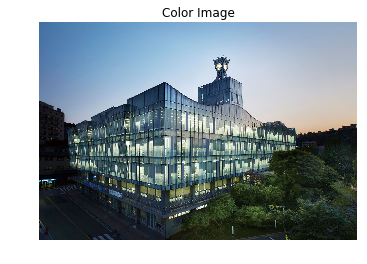

In [8]:
file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)

p1 = plt.subplot(1,1,1)
p1.set_title('Color Image')
plt.imshow(im_color)
plt.axis('off')
plt.show()

# Visualize the derivative x of the color image.

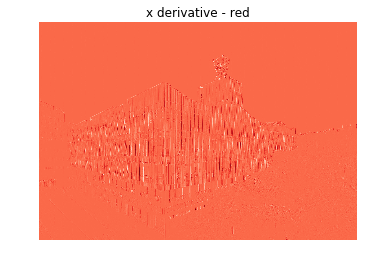

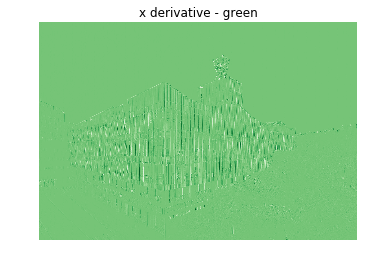

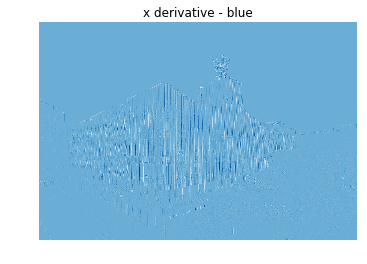

In [9]:
for i in range(0,3):
    dx = computeXderivative(im_color[:,:,i])
    if(i == 0):
        p1 = plt.subplot(1,1,1)
        p1.set_title('x derivative - red')
        plt.imshow(dx, cmap='Reds')
        plt.axis('off')
        plt.show()
    elif(i == 1):
        p1 = plt.subplot(1,1,1)
        p1.set_title('x derivative - green')
        plt.imshow(dx, cmap='Greens')
        plt.axis('off')
        plt.show()
    elif(i == 2):
        p1 = plt.subplot(1,1,1)
        p1.set_title('x derivative - blue')
        plt.imshow(dx, cmap='Blues')
        plt.axis('off')
        plt.show()

# Visualize the derivative y of the color image.

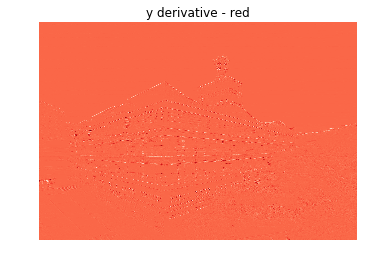

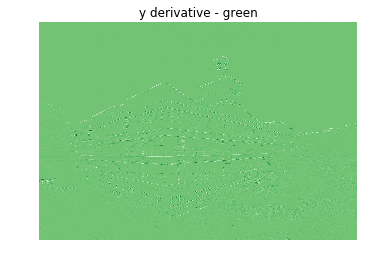

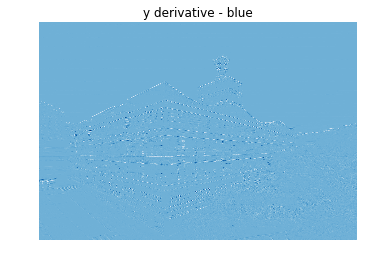

In [10]:
for i in range(0,3):
    dy = computeYderivative(im_color[:,:,i])
    if(i == 0):
        p1 = plt.subplot(1,1,1)
        p1.set_title('y derivative - red')
        plt.imshow(dy, cmap='Reds')
        plt.axis('off')
        plt.show()
    elif(i == 1):
        p1 = plt.subplot(1,1,1)
        p1.set_title('y derivative - green')
        plt.imshow(dy, cmap='Greens')
        plt.axis('off')
        plt.show()
    elif(i == 2):
        p1 = plt.subplot(1,1,1)
        p1.set_title('y derivative - blue')
        plt.imshow(dy, cmap='Blues')
        plt.axis('off')
        plt.show()

# Visualize the magnitude of the color image.

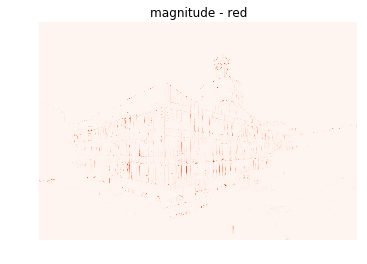

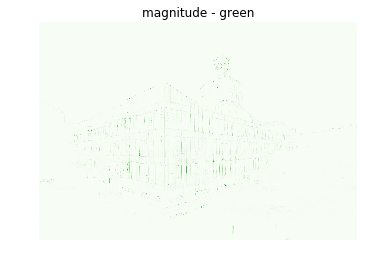

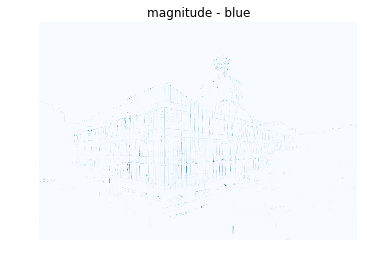

In [11]:
for i in range(0,3):
    magnitude = computeMagnitude(im_color[:,:,i])
    if(i == 0):
        p1 = plt.subplot(1,1,1)
        p1.set_title('magnitude - red')
        plt.imshow(magnitude, cmap='Reds')
        plt.axis('off')
        plt.show()
    elif(i == 1):
        p1 = plt.subplot(1,1,1)
        p1.set_title('magnitude - green')
        plt.imshow(magnitude, cmap='Greens')
        plt.axis('off')
        plt.show()
    elif(i == 2):
        p1 = plt.subplot(1,1,1)
        p1.set_title('magnitude - blue')
        plt.imshow(magnitude, cmap='Blues')
        plt.axis('off')
        plt.show()

# Visualize the direction of the color image.

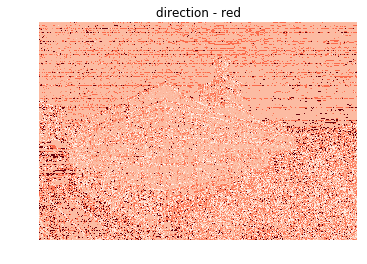

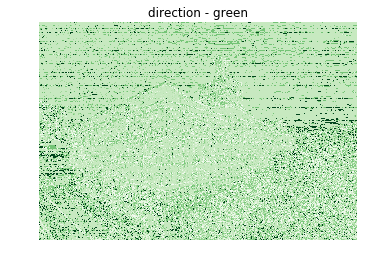

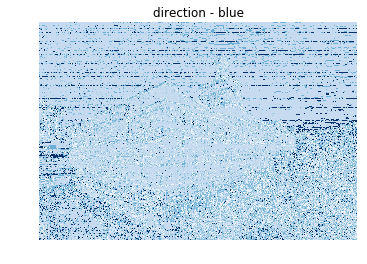

In [12]:
for i in range(0,3):
    direction = computeDirection(im_color[:,:,i])
    if(i == 0):
        p1 = plt.subplot(1,1,1)
        p1.set_title('direction - red')
        plt.imshow(direction, cmap='Reds')
        plt.axis('off')
        plt.show()
    elif(i == 1):
        p1 = plt.subplot(1,1,1)
        p1.set_title('direction - green')
        plt.imshow(direction, cmap='Greens')
        plt.axis('off')
        plt.show()
    elif(i == 2):
        p1 = plt.subplot(1,1,1)
        p1.set_title('direction - blue')
        plt.imshow(direction, cmap='Blues')
        plt.axis('off')
        plt.show()

# Visualize the smoothing of the color image.

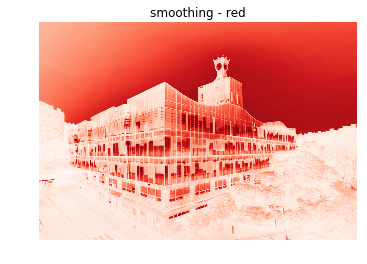

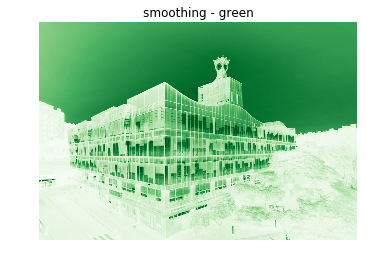

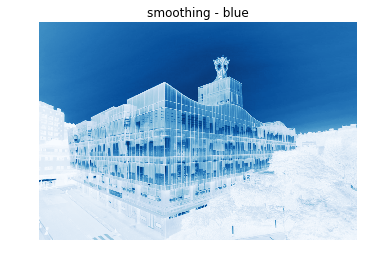

In [13]:
for i in range(0,3):
    smooth = smoothing(im_color[:,:,i])
    if(i == 0):
        p1 = plt.subplot(1,1,1)
        p1.set_title('smoothing - red')
        plt.imshow(smooth, cmap='Reds')
        plt.axis('off')
        plt.show()
    elif(i == 1):
        p1 = plt.subplot(1,1,1)
        p1.set_title('smoothing - green')
        plt.imshow(smooth, cmap='Greens')
        plt.axis('off')
        plt.show()
    elif(i == 2):
        p1 = plt.subplot(1,1,1)
        p1.set_title('smoothing - blue')
        plt.imshow(smooth, cmap='Blues')
        plt.axis('off')
        plt.show()

# Visualize own kernel(horizontal edge detection) of the color image.

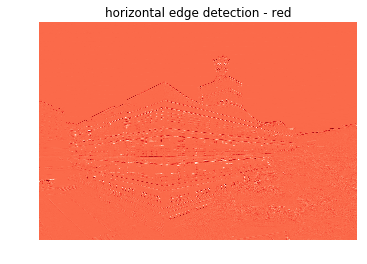

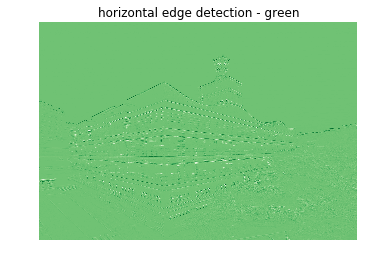

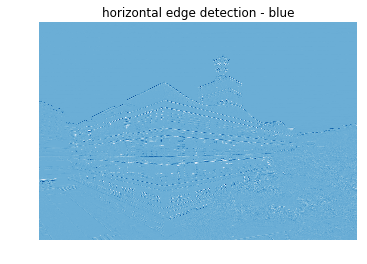

In [14]:
for i in range(0,3):
    horizontal = own_kernel(im_color[:,:,i])
    if(i == 0):
        p1 = plt.subplot(1,1,1)
        p1.set_title('horizontal edge detection - red')
        plt.imshow(horizontal, cmap='Reds')
        plt.axis('off')
        plt.show()
    elif(i == 1):
        p1 = plt.subplot(1,1,1)
        p1.set_title('horizontal edge detection - green')
        plt.imshow(horizontal, cmap='Greens')
        plt.axis('off')
        plt.show()
    elif(i == 2):
        p1 = plt.subplot(1,1,1)
        p1.set_title('horizontal edge detection - blue')
        plt.imshow(horizontal, cmap='Blues')
        plt.axis('off')
        plt.show()

# Visualize the gray image.

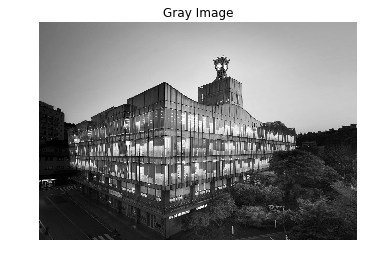

In [15]:
im_gray  	= color.rgb2gray(im_color)

p1 = plt.subplot(1,1,1)
p1.set_title('Gray Image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.show()

# Visualize the derivative x of the gray image.

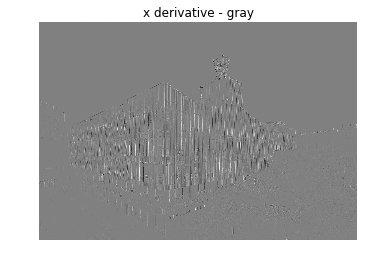

In [16]:
dx = computeXderivative(im_gray)

p1 = plt.subplot(1,1,1)
p1.set_title('x derivative - gray')
plt.imshow(dx, cmap='gray')
plt.axis('off')
plt.show()

# Visualize the derivative y of the gray image.

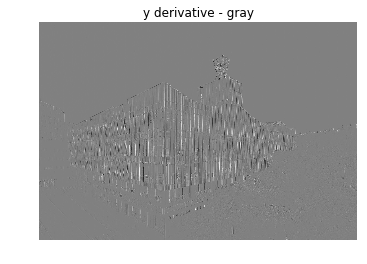

In [17]:
dy = computeXderivative(im_gray)

p1 = plt.subplot(1,1,1)
p1.set_title('y derivative - gray')
plt.imshow(dy, cmap='gray')
plt.axis('off')
plt.show()

# Visualize the magnitude of the gray image.

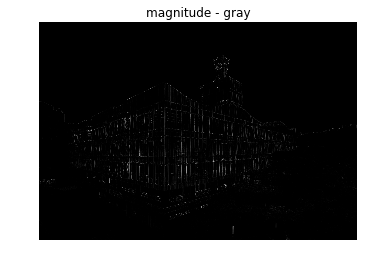

In [18]:
magnitude = computeMagnitude(im_gray)

p1 = plt.subplot(1,1,1)
p1.set_title('magnitude - gray')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')
plt.show()

# Visualize the direction of the gray image.

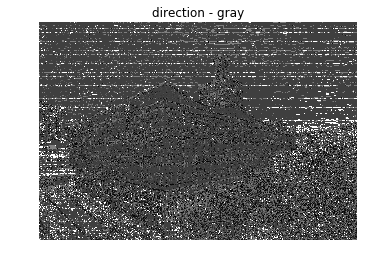

In [19]:
direction = computeDirection(im_gray)

p1 = plt.subplot(1,1,1)
p1.set_title('direction - gray')
plt.imshow(direction, cmap='gray')
plt.axis('off')
plt.show()

# Visualize smoothing of the gray image.

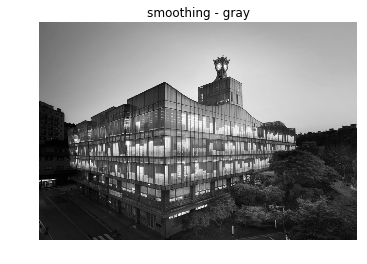

In [20]:
smooth = smoothing(im_gray)
p1 = plt.subplot(1,1,1)
p1.set_title('smoothing - gray')
plt.imshow(smooth, cmap='gray')
plt.axis('off')
plt.show()

# Visualize own kernel(horizontal edge detection) of the gray image.

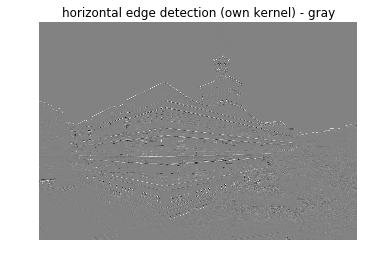

In [21]:
horizontal = own_kernel(im_gray)
p1 = plt.subplot(1,1,1)
p1.set_title('horizontal edge detection (own kernel) - gray')
plt.imshow(horizontal, cmap='gray')
plt.axis('off')
plt.show()